cuda
tensor(999.9811, device='cuda:0')


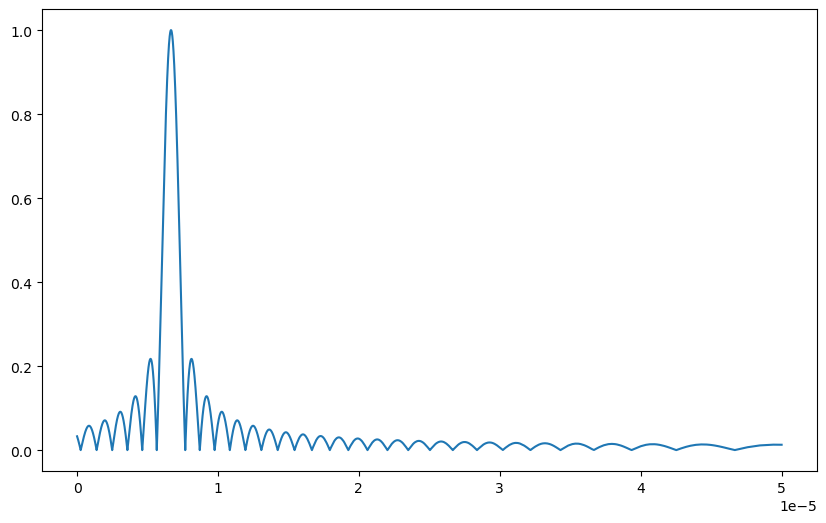

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from deap.tools import Statistics
from pulses import RadarPulseGenerator, CommPulseGenerator, generate_walsh_matrix
import torch
from tqdm import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'
print(device)
t = torch.linspace(0, 1e-4, int(1e7), device=device)
dt = t[1] - t[0]
# Define parameters
T = 1e-4       # Total duration of radar pulse (1e-4 seconds)
B = 1e6        # Bandwidth of radar pulse (1 MHz)
K = 5         # Number of users (OFDMA users)
L = 100        # Number of bits in radar pulse duration
Tb = T / L     # Duration of each bit interval
distance = 1000
my_tau = 2*distance / 3e8
snr_db = 300
Ptotal_dbm = 30
snr = 10**(snr_db/10)
Ptotal = 10**((Ptotal_dbm-30)/10)

myCommPulses = CommPulseGenerator(t, Tb, T, device)
myRadarPulses = RadarPulseGenerator(t, T=T, device=device)

radar_pulse = myRadarPulses.LFM_pulse(B)
radar_pulse = radar_pulse / torch.sqrt(torch.sum(torch.abs(radar_pulse)**2)*dt)

rx_signal = radar_pulse + np.sqrt(1/snr)*torch.randn(len(radar_pulse), device=device), shifts=int(my_tau / dt))
xcorr_rx = myRadarPulses.cross_correlation(radar_pulse, rx_signal)
# ax.plot(delays, data2)
print(t[torch.argmax(xcorr_rx)]*3e8 / 2)
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
ax.plot(t[:int(len(t)/2)].cpu(), xcorr_rx.cpu())
